In [40]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import statistics
import warnings

from itertools import product
from plotly.figure_factory import create_scatterplotmatrix
from plotly.graph_objects import Figure
from plotly.offline import iplot
from plotly.subplots import make_subplots
from scipy.cluster import hierarchy
from sklearn.cluster import AffinityPropagation, AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from pywaffle import Waffle

with warnings.catch_warnings():
    warnings.simplefilter('ignore')


In [41]:
file_path = "../resources/data/output/online_retail_cleaned.csv"   
df = pd.read_csv(file_path)
print(df.head())
print(df.isnull().sum())


   InvoiceNo StockCode                          Description  Quantity  \
0     536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1     536365     71053                  WHITE METAL LANTERN         6   
2     536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3     536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4     536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0  2010-01-12 08:26:00       2.55     17850.0  United Kingdom  2010      1   
1  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010      1   
2  2010-01-12 08:26:00       2.75     17850.0  United Kingdom  2010      1   
3  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010      1   
4  2010-01-12 08:26:00       3.39     17850.0  United Kingdom  2010      1   

   Day  
0   12  
1   12  
2   12  
3   12  
4   12  
InvoiceNo      0
StockCode      0
Desc

In [42]:

# Check data types of each column
print(df.dtypes)
# Calculate descriptive statistics
descriptive_stats = df.describe()
descriptive_stats

InvoiceNo        int64
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
Year             int64
Month            int64
Day              int64
dtype: object


,InvoiceNo,Quantity,UnitPrice,CustomerID,Year,Month,Day
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,560591.072436,13.153718,3.125596,15287.734822,2010.934630,6.942118,15.704468
std,13087.116747,181.588420,22.240725,1713.567773,0.247178,3.328213,8.047342
min,536365.000000,1.000000,0.000000,12346.000000,2010.000000,1.000000,1.000000
25%,549234.000000,2.000000,1.250000,13955.000000,2011.000000,4.000000,10.000000
50%,561874.000000,6.000000,1.950000,15150.000000,2011.000000,7.000000,15.000000
75%,572061.000000,12.000000,3.750000,16791.000000,2011.000000,10.000000,22.000000
max,581587.000000,80995.000000,8142.750000,18287.000000,2011.000000,12.000000,31.000000


**Descriptive Statistics**

In [43]:
# Select only numerical columns excluding CustomerID

numeric_data = df.drop(columns=['Description', 'InvoiceNo', 'InvoiceDate', 'CustomerID', 'Country'])
summary = pd.DataFrame(numeric_data.describe())
summary = summary.style.background_gradient(cmap = 'Blues') \
          .set_table_attributes("style = 'display: inline'") \
          .set_caption('Statistics of the Online Retail Dataset') \
          .set_table_styles([{
                'selector': 'caption',
                'props': [
                    ('font-size', '16px')
                ]
          }])
summary



,Quantity,UnitPrice,Year,Month,Day
count,392732.000000,392732.000000,392732.000000,392732.000000,392732.000000
mean,13.153718,3.125596,2010.934630,6.942118,15.704468
std,181.588420,22.240725,0.247178,3.328213,8.047342
min,1.000000,0.000000,2010.000000,1.000000,1.000000
25%,2.000000,1.250000,2011.000000,4.000000,10.000000
50%,6.000000,1.950000,2011.000000,7.000000,15.000000
75%,12.000000,3.750000,2011.000000,10.000000,22.000000
max,80995.000000,8142.750000,2011.000000,12.000000,31.000000


   Quantity  UnitPrice  Year  Month  Day
0         6       2.55  2010      1   12
1         6       3.39  2010      1   12
2         8       2.75  2010      1   12
3         6       3.39  2010      1   12
4         6       3.39  2010      1   12


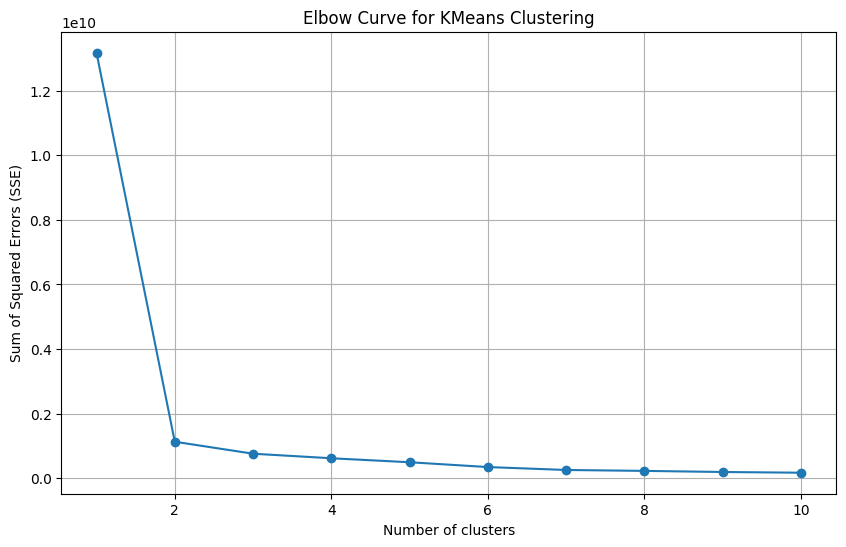

In [44]:
#fig = ff.create_scatterplotmatrix(numeric_data, diag = 'box', index = 'Year', colormap = ['#FFFF01', '#8D00CB'])

# Select only numerical columns excluding CustomerID
numeric_data = df.select_dtypes(include='number')
numeric_data = numeric_data.drop(columns=['CustomerID', 'InvoiceNo'])
print(numeric_data.head())
# Perform KMeans clustering and find the elbow curve
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numeric_data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Curve for KMeans Clustering')
plt.grid(True)
plt.show()



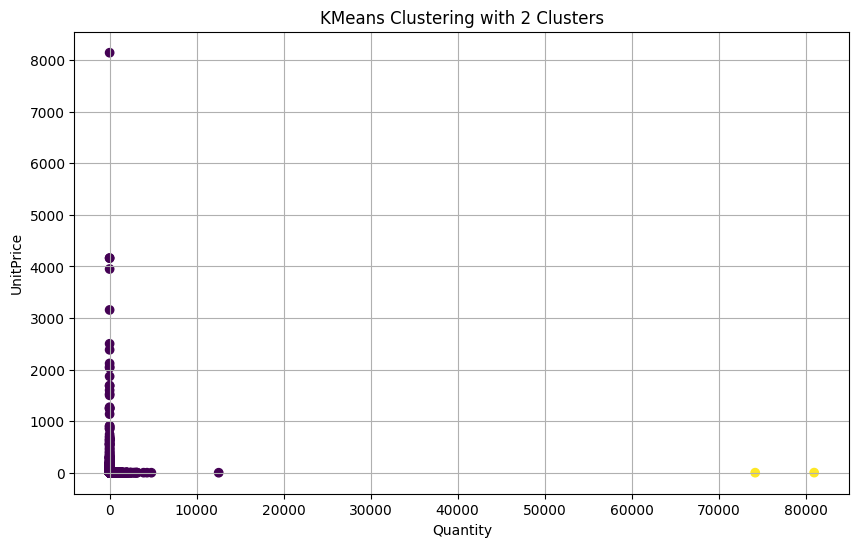

In [45]:
from sklearn.metrics import silhouette_score

# Perform KMeans clustering with 2 clusters
kmeans_2_clusters = KMeans(n_clusters=2, random_state=42)
df['Cluster'] = kmeans_2_clusters.fit_predict(numeric_data)
# Plot the scatter plot for KMeans clustering with 2 clusters
plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], c=df['Cluster'], cmap='viridis', marker='o')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.title('KMeans Clustering with 2 Clusters')
plt.grid(True)
plt.show()
# Calculate silhouette score for KMeans clustering with 2 clusters
#silhouette_avg_2_clusters = silhouette_score(numeric_data, df['Cluster'])
#print(f'Silhouette Score for 2 Clusters: {silhouette_avg_2_clusters}')



In [47]:
 # Calculate the number of unique customers
unique_customers = df['CustomerID'].nunique()
print(f'Number of unique customers: {unique_customers}')
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of countries in the dataframe: {}'.format(len(countries)))

Number of unique customers: 4339
Number of countries in the dataframe: 37


In [48]:
import nbformat
from plotly.offline import iplot
unique_customers = df['CustomerID'].nunique()
print(f'Number of unique customers: {unique_customers}')
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()
print('Number of countries in the dataframe: {}'.format(len(countries)))

data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)


Number of unique customers: 4339
Number of countries in the dataframe: 37


In [49]:
print("Number of unique products, transactions and customers in the dataset")
pd.DataFrame([{'products': len(df['StockCode'].value_counts()),    
               'transactions': len(df['InvoiceNo'].value_counts()),
               'customers': len(df['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])



Number of unique products, transactions and customers in the dataset


,products,transactions,customers
quantity,3665,18536,4339


Now lets determine products purchased in every transaction 

In [50]:
temp = df.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket[:20].sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12347.0,537626,31
2,12347.0,542237,29
3,12347.0,549222,24
4,12347.0,556201,18
5,12347.0,562032,22
6,12347.0,573511,47
7,12347.0,581180,11
11,12348.0,568172,3
10,12348.0,548955,5


In summary, above code snippet groups the data by customer and invoice, counts the number of occurrences of each invoice date within those groups, and stores the result in a new DataFrame called temp. It can be useful for understanding the frequency of transactions for each customer and invoice combination. Particularly it shows the frequent customers.
The first line shows the customer purchased 1 item only once and never returned. 

In [51]:
import nltk 
is_noun = lambda pos: pos[:2] == 'NN'

def keywords_inventory(dataframe, colonne = 'Description'):
    stemmer = nltk.stem.SnowballStemmer("english")
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys   = []
    count_keywords  = dict()
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        lines = s.lower()
        tokenized = nltk.word_tokenize(lines)
        nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
        
        for t in nouns:
            t = t.lower() ; racine = stemmer.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
                count_keywords[racine] += 1                
            else:
                keywords_roots[racine] = {t}
                count_keywords[racine] = 1
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select, count_keywords

df_products = pd.DataFrame(df['Description'].unique()).rename(columns = {0:'Description'})
keywords, keywords_roots, keywords_select, count_keywords = keywords_inventory(df_products)


Nb of keywords in variable 'Description': 1477


In [52]:
list_products = []
for k,v in count_keywords.items():
    word = keywords_select[k]
    if word in ['pink', 'blue', 'tag', 'green', 'orange']: continue
    if len(word) < 3 or v < 13: continue
    if ('+' in word) or ('/' in word): continue
    list_products.append([word, v])

list_products.sort(key = lambda x:x[1], reverse = True)
print('preserved words are:', len(list_products))



preserved words are: 191


In [70]:
# The X matrix indicates the words contained in the description of the products using the one-hot-encoding principle.
list_products = df['Description'].unique()
X = pd.DataFrame()
for occurence, key in enumerate(list_products):
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), list_products))

threshold = [0, 1, 2, 3, 5, 10]
label_col = []
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])
    label_col.append(col)
    X.loc[:, col] = 0

print("{:<8} {:<20} \n".format('gamma', 'no. products') + 20*'-')
for i in range(len(threshold)):
    if i == len(threshold)-1:
        col = '.>{}'.format(threshold[i])
    else:
        col = '{}<.<{}'.format(threshold[i],threshold[i+1])    
    print("{:<10}  {:<20}".format(col, X.loc[:, col].sum()))

for i, prod in enumerate(list_products):
    prix = df[ df['Description'] == prod]['UnitPrice'].mean()
    j = 0
    while prix > threshold[j]:
        j+=1
        if j == len(threshold): break
    X.loc[i, label_col[j-1]] = 1

list_products = df['Description'].unique()
X = pd.DataFrame()

for key in list_products:
    X.loc[:, key] = list(map(lambda x:int(key.upper() in x), list_products))
X.head()
matrix = X.to_numpy()
for n_clusters in range(3,10):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=30)
    kmeans.fit(matrix)
    clusters = kmeans.predict(matrix)
    silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

/var/folders/nc/c1f7009j52s296010jg0vpyh0000gp/T/ipykernel_4482/2849227601.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/nc/c1f7009j52s296010jg0vpyh0000gp/T/ipykernel_4482/2849227601.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/nc/c1f7009j52s296010jg0vpyh0000gp/T/ipykernel_4482/2849227601.py:5: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.conca

gamma    no. products         
--------------------
0<.<1       0                   
1<.<2       0                   
2<.<3       0                   
3<.<5       0                   
5<.<10      0                   
.>10        0                   


/var/folders/nc/c1f7009j52s296010jg0vpyh0000gp/T/ipykernel_4482/2849227601.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/nc/c1f7009j52s296010jg0vpyh0000gp/T/ipykernel_4482/2849227601.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`

/var/folders/nc/c1f7009j52s296010jg0vpyh0000gp/T/ipykernel_4482/2849227601.py:37: PerformanceWarning:

DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.co

For n_clusters = 3 The average silhouette_score is : -0.0020167775138609225
For n_clusters = 4 The average silhouette_score is : -0.0020167713144927236
For n_clusters = 5 The average silhouette_score is : -0.001774822985709802
For n_clusters = 6 The average silhouette_score is : -0.0025364256797938663
For n_clusters = 7 The average silhouette_score is : -0.0024212848410588676
For n_clusters = 8 The average silhouette_score is : -0.0016701222146056531
For n_clusters = 9 The average silhouette_score is : -0.0020167402696440557


A silhouette score below 0.25 suggests that the clusters are not well-separated and may need to be re-evaluated.